### Knock91: PyCaret で回帰 Model の前処理を実施しよう

In [1]:
# Boston の住宅価格 Dataset を取得
from pycaret.datasets import get_data
boston_data_all = get_data('boston')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
# 未見 Data の取得
boston_data = boston_data_all.sample(frac=0.90, random_state=0).reset_index(drop=True)
boston_data_unseen = boston_data_all.drop(boston_data.index).reset_index(drop=True)
print('All Data: ' + str(boston_data_all.shape))
print('Data for Modeling:' + str(boston_data.shape))  # 90% を訓練 Data として取り分け
print('Unseen Data For Predictions:' + str(boston_data_unseen.shape))
    # PyCaret に公開しない未見 Data として取り分け。学習済 Model の仕上げの評価時に利用する。

All Data: (506, 14)
Data for Modeling:(455, 14)
Unseen Data For Predictions:(51, 14)


In [3]:
# # setup 関数の実行
# from pycaret.regression import *  # PyCaret の回帰系 Library を import
#
# ret = setup(  # setup() 関数で Data を分析し、必要な前処理を自動的に行なってくれる。
#     boston_data,  # Dataset
#     target='medv',  # 目的変数を指定
#     normalize=False,  # 標準化するかどうかを指定
#     session_id=0  # PyCaret 実行時の識別子。内部的には乱数の seed となっており、指定しないと Random に決定される(sklean の random_state= にあたる）
# )

In [4]:
# setup Dialog で変数型の再確認
# setup Dialog で前処理結果の確認
from pycaret.regression import *  # PyCaret の回帰系 Library を import

ret = setup(  # setup() 関数で Data を分析し、必要な前処理を自動的に行なってくれる。
    boston_data,  # Dataset
    target='medv',  # 目的変数を指定
    normalize=False,  # 標準化するかどうかを指定
    session_id=0,  # PyCaret 実行時の識別子。内部的には乱数の seed となっており、指定しないと Random に決定される(sklean の random_state= にあたる）
    numeric_features=['chas'],  # 型を明示的に指定
    categorical_features=['rad']  # 型を明示的に指定
)

,Description,Value
0,session_id,0
1,Target,medv
2,Original Data,"(455, 14)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(318, 21)"


`setup()` では欠損処理, Data の分割(train_test_split) などを実施しており、完了すると結果が表示され Data size や説明変数の数や各種前処理の指定の有無などを確認できる。

#### 代表的な項目
| 項目名                                         | 概要                                              |
|---------------------------------------------|-------------------------------------------------|
| Missing Values                              | 元の Data に欠損値がある場合、True が 表示される。                 |
| Transformed Train Set, Transformed Test Set | Default で訓練 Data は 70%, Test-data は 30% になっている。 |
| Categorical Features                        | 説明変数が Category変数に変換された数                         |

### Knock92: PyCaret で train_size を変更してみよう

In [5]:
# train_size の変更
ret = setup(boston_data,
            target='medv',
            session_id=0,
            normalize=False,
            numeric_features=['chas'],
            categorical_features=['rad'],
            train_size=0.8,  # 訓練 Data の分割の割合を指定
            silent=True  # Dialog の型確認を True にすると skip する。
            )

,Description,Value
0,session_id,0
1,Target,medv
2,Original Data,"(455, 14)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(364, 21)"


### Knock93: PyCaret で回帰 Model を構築しよう

In [6]:
# PyCaret 対応の回帰 Model 一覧
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


PyCaret には Wrap されている Algorithm群で評価した結果を一覧で提示してくれる機能がある。

In [7]:
# 各 Model の評価一覧
compare_models(sort='R2', fold=10)
    # sort= していした項目で降順表示
    # fold= 交差検証を実施しており、Data の分割数を指定

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1839,9.5456,3.0433,0.8761,0.1401,0.1107,0.1590
gbr,Gradient Boosting Regressor,2.1968,9.3363,3.0085,0.8746,0.1395,0.1109,0.0230
lightgbm,Light Gradient Boosting Machine,2.3779,11.9894,3.4159,0.8436,0.1505,0.1185,0.0150
ada,AdaBoost Regressor,2.6713,12.6488,3.5252,0.8343,0.1708,0.1432,0.0250
rf,Random Forest Regressor,2.4777,13.1299,3.5434,0.8311,0.1585,0.1257,0.1880
lr,Linear Regression,3.4096,23.6076,4.7780,0.7074,0.2249,0.1714,0.2390
ridge,Ridge Regression,3.3909,23.8042,4.7885,0.7055,0.2287,0.1714,0.0060
br,Bayesian Ridge,3.4111,24.4277,4.8448,0.6996,0.2331,0.1726,0.0060
lar,Least Angle Regression,3.5413,24.7594,4.8886,0.6949,0.2301,0.1765,0.0070
huber,Huber Regressor,3.3084,26.5793,4.9671,0.6824,0.2404,0.1641,0.0120


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=0, verbose=0, warm_start=False)

`compare_models` を実行することで対応している各 Model の評価を一覧で表示。
この時点では Hyper Parameter の最適化は行なわれていない。よって、
1. 各 Model の評価一覧を表示
2. 精度の高い Model を複数選定
3. それぞれ tuning して評価

としてくことが、Model 構築していく一覧の流れになる。

### Knock94: PyCaret で Hyper parameter を tuning しよう

In [8]:
# 回帰 Model の作成
rf = create_model('rf', fold=10)  # 第１引数に 機械学習 Model の ID を渡すことで機械学習 Model を設定

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.6951,17.7577,4.2140,0.8038,0.1707,0.1078
1,2.4529,11.0652,3.3264,0.9005,0.1622,0.1285
2,2.5246,11.3592,3.3703,0.8075,0.1525,0.1193
3,2.7081,22.7144,4.7660,0.6342,0.1783,0.1355
4,2.8522,21.2313,4.6077,0.7764,0.1977,0.1620
5,2.5445,11.2662,3.3565,0.9245,0.1736,0.1454
6,2.0312,6.8169,2.6109,0.8758,0.1411,0.1199
7,2.6908,14.6318,3.8252,0.8657,0.1668,0.1330
8,2.0722,5.9796,2.4453,0.9177,0.1153,0.0979


In [9]:
# Hyper Parameter Tuning
tuned_rf = tune_model(rf, optimize='r2', fold=10)  # optimize= に tuning の対象指標を指定
tuned_rf

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0067,24.7128,4.9712,0.7270,0.1684,0.1143
1,2.6783,13.3939,3.6598,0.8796,0.1554,0.1315
2,2.1061,6.9402,2.6344,0.8824,0.1195,0.1020
3,2.3236,9.8265,3.1347,0.8417,0.1271,0.1076
4,3.4036,34.1707,5.8456,0.6401,0.2276,0.1853
5,2.9022,13.4361,3.6655,0.9100,0.1628,0.1463
6,2.0842,6.3144,2.5128,0.8850,0.1483,0.1268
7,3.1428,20.3447,4.5105,0.8132,0.1911,0.1512
8,2.2145,8.1430,2.8536,0.8879,0.1199,0.0996


RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.05,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=9, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [10]:
# Hyper Parameter Tuning
tuned_rf = tune_model(rf, optimize='r2', fold=10, n_iter=50)  # n_iter= Parameter検索の繰り返し回数の指定（※Default: 10）
tuned_rf

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.6705,17.5881,4.1938,0.8057,0.1576,0.1073
1,2.6953,13.2585,3.6412,0.8808,0.1559,0.1325
2,2.0749,6.7700,2.6019,0.8853,0.1212,0.1030
3,2.3891,10.1788,3.1904,0.8361,0.1330,0.1136
4,3.1798,27.4997,5.2440,0.7104,0.2158,0.1802
5,2.7368,11.4151,3.3786,0.9235,0.1550,0.1404
6,2.0337,5.9824,2.4459,0.8910,0.1445,0.1230
7,3.0874,19.6551,4.4334,0.8196,0.1879,0.1477
8,2.1652,7.3241,2.7063,0.8992,0.1150,0.0972


RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=290, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

PyCaret では、Tuning に RandomGrid検索が採用されている。
`n_iter=` の回数を増やすことで精度は向上するが、その分、時間はかかるようになる。

### Knock95: PyCaret で回帰 Model を評価しよう

In [11]:
# evaluate_model Dialog
evaluate_model(tuned_rf)  # Model を渡し表示される Dialog で、PlotType を切り替えることで、様々な評価指標が確認できる。

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

`Plot_model()` で個別に Graph を表示できる

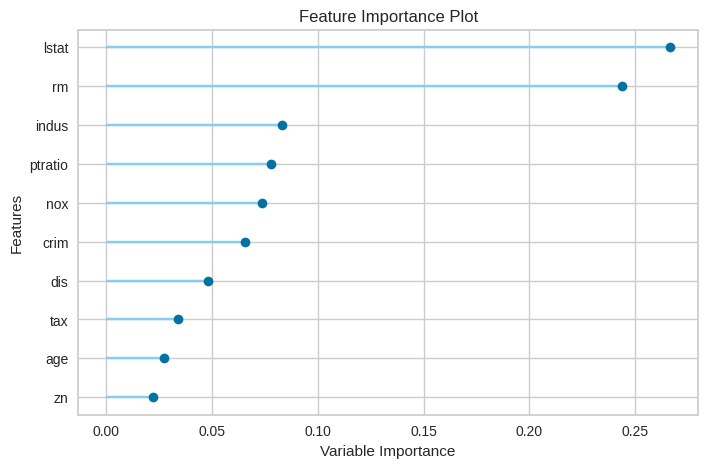

In [12]:
# Feature Importance  # 説明変数の重要度
plot_model(tuned_rf, 'feature')

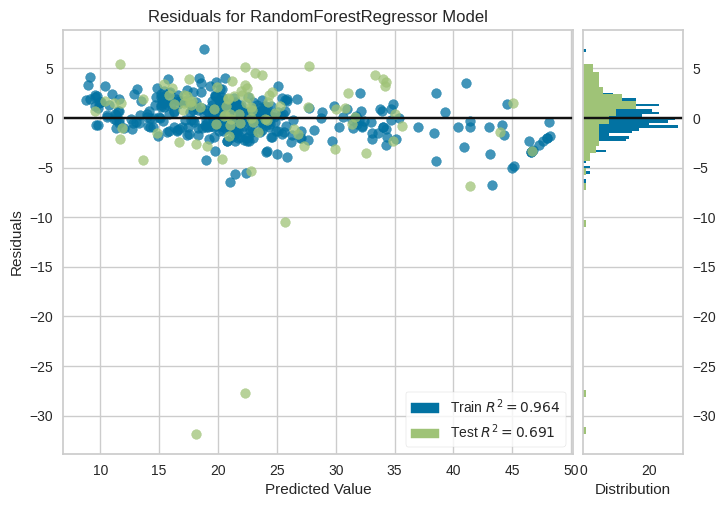

In [13]:
# Residuals Plot  # 残差Plot
plot_model(tuned_rf, 'residuals')

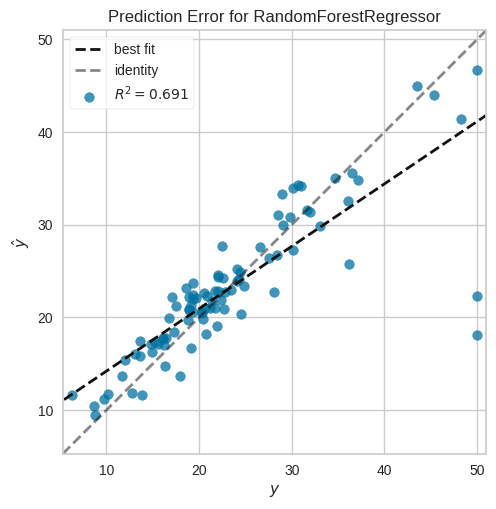

In [14]:
# Prediction Error Plot
## 予測精度を確認できる指標。identity に対するズレ（予測と実測の誤差）から Model が設定されている評価指標が計算される。
## 予測と実測が Equal になる場合、分布が y=x の直線付近に近づく。
plot_model(tuned_rf, 'error')

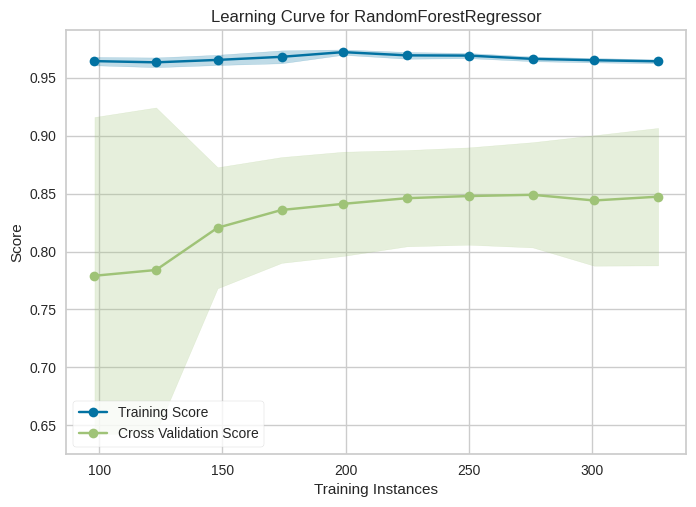

In [15]:
# Learning Curve（学習曲線を確認できる項目）
## 訓練 Data と Test Data の予測精度が、Data数に対してどのように推移しているかが分かる。
plot_model(tuned_rf, 'learning')